In [27]:
import pandas as pd
import numpy as np
from sklearn.externals import joblib
from utils.classifications_utils import *
from utils.data_processing_utils import *
from utils.data_visualization_utils import *
from utils.metrics_utils import *
from utils.grid_search_utils import *
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [28]:
no_wind_data = load_data(0, 3)
no_wind_data = separate_data_based_on_apparatus(no_wind_data)

level_1_wind = load_data(1, 3)
level_1_wind = separate_data_based_on_apparatus(level_1_wind)

level_3_wind = load_data(3, 3)
level_3_wind = separate_data_based_on_apparatus(level_3_wind)

level_6_wind = load_data(6, 3)
level_6_wind = separate_data_based_on_apparatus(level_6_wind)

level_8_wind = load_data(8, 3)
level_8_wind = separate_data_based_on_apparatus(level_8_wind)

In [29]:
acc_no_wind, gyro_no_wind, _, _ = no_wind_data.values()
label_0 = [0 for x in range(acc_no_wind.shape[0])]

acc_level_1_wind, gyro_level_1_wind, _, _ = level_1_wind.values()
label_1 = [1 for x in range(acc_level_1_wind.shape[0])]

acc_level_3_wind, gyro_level_3_wind, _, _ = level_3_wind.values()
label_2 = [2 for x in range(acc_level_3_wind.shape[0])]

acc_level_6_wind, gyro_level_6_wind, _, _ = level_6_wind.values()
label_3 = [3 for x in range(acc_level_6_wind.shape[0])]

acc_level_8_wind, gyro_level_8_wind, _, _ = level_8_wind.values()
label_4 = [4 for x in range(acc_level_8_wind.shape[0])]

# Visualize data in frequency domain: no wind

In [30]:
from scipy import signal
from utils.reduce_noise_utils import *

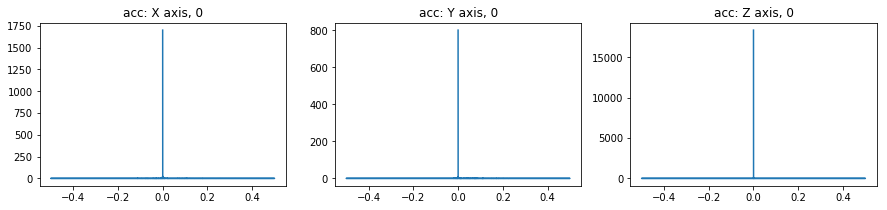

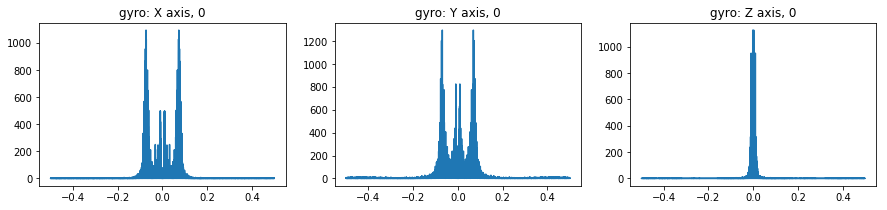

In [31]:
plot_in_frequency_domain(acc_no_wind, 0, 'acc')
plot_in_frequency_domain(gyro_no_wind, 0, 'gyro')

# Reduce noise

In [32]:
gyro_no_wind_reduced = reduce_noise_with_FFT(gyro_no_wind, [100, 300, 200])

# Visualize data in frequency domain: level 1

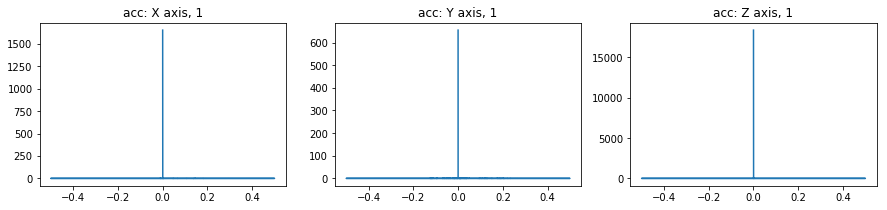

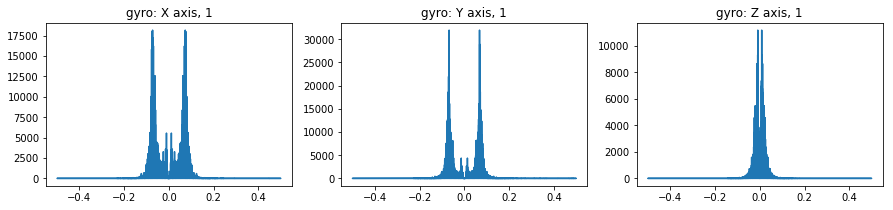

In [33]:
plot_in_frequency_domain(acc_level_1_wind, 1, 'acc')
plot_in_frequency_domain(gyro_level_1_wind, 1, 'gyro')

In [56]:
# Reduce noise

In [35]:
gyro_level_1_reduced = reduce_noise_with_FFT(gyro_level_1_wind, [2500, 5000, 2000])

# Visualize data in frequency domain: level 3

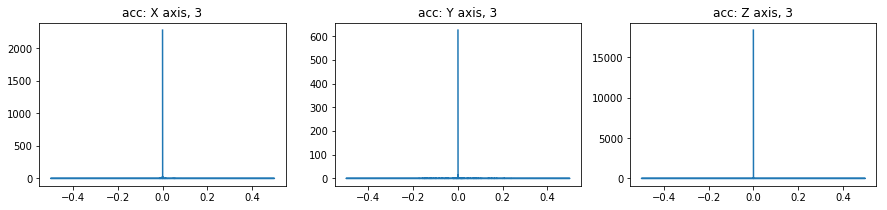

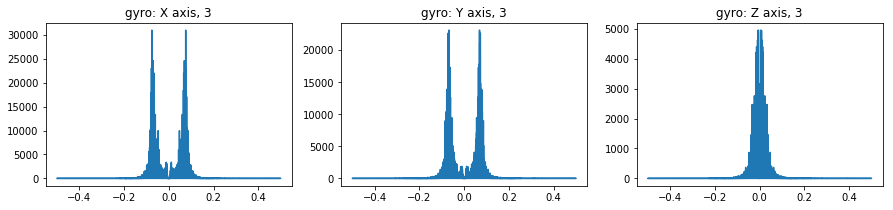

In [36]:
plot_in_frequency_domain(acc_level_3_wind, 3, 'acc')
plot_in_frequency_domain(gyro_level_3_wind, 3, 'gyro')

# Reduce noise

In [37]:
gyro_level_3_reduced = reduce_noise_with_FFT(gyro_level_3_wind, [3000, 2000, 300])

# Visualize data in frequency domain: level 6

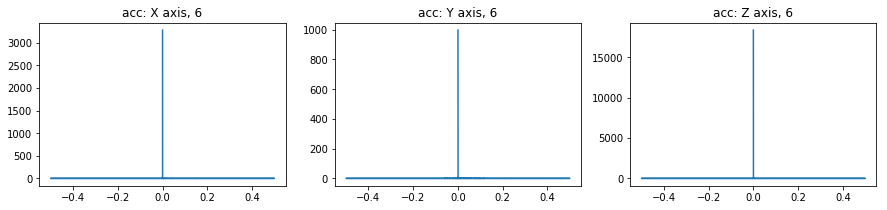

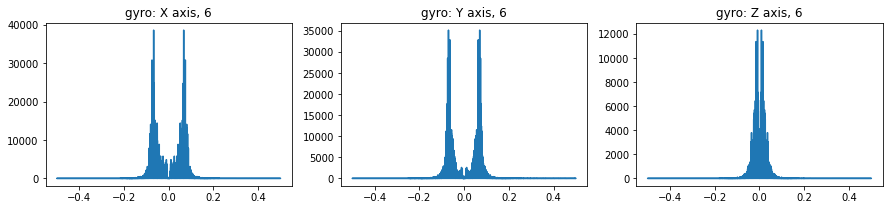

In [38]:
plot_in_frequency_domain(acc_level_6_wind, 6, 'acc')
plot_in_frequency_domain(gyro_level_6_wind, 6, 'gyro')

# Reduce noise

In [39]:
gyro_level_6_reduced = reduce_noise_with_FFT(gyro_level_6_wind, [6000, 2000, 300])

# Visualize data in frequency domain: level 8

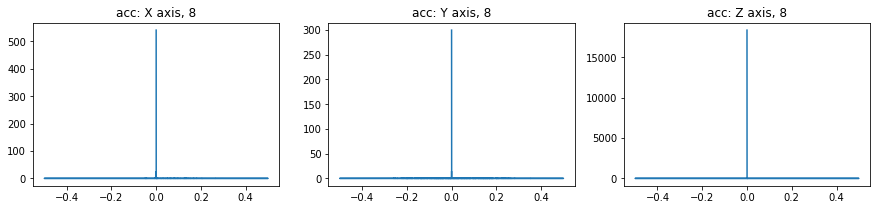

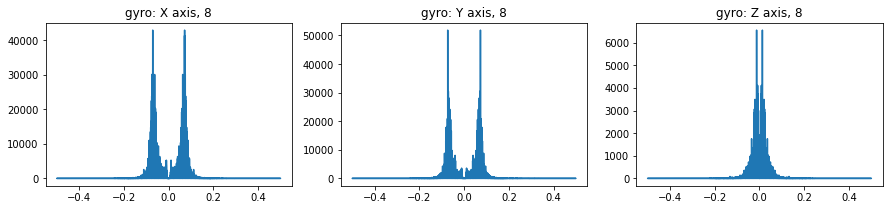

In [40]:
plot_in_frequency_domain(acc_level_8_wind, 8, 'acc')
plot_in_frequency_domain(gyro_level_8_wind, 8, 'gyro')

# Reduce Data

In [41]:
gyro_level_8_reduced = reduce_noise_with_FFT(gyro_level_8_wind, [6000, 2000, 1000])

# Split No Wind Data

In [42]:
X_train_acc_0, X_test_acc_0, y_train_acc_0, y_test_acc_0 = \
train_test_split(acc_no_wind, label_0, test_size=0.2, shuffle=False)

X_train_gyro_0, X_test_gyro_0, y_train_gyro_0, y_test_gyro_0 = \
train_test_split(gyro_no_wind_reduced, label_0, test_size=0.2, shuffle=False)

# Split Level 1 Wind

In [43]:
X_train_acc_1, X_test_acc_1, y_train_acc_1, y_test_acc_1 = \
train_test_split(acc_level_1_wind, label_1, test_size=0.2, shuffle=False)

X_train_gyro_1, X_test_gyro_1, y_train_gyro_1, y_test_gyro_1 = \
train_test_split(gyro_level_1_reduced, label_1, test_size=0.2, shuffle=False)

# Split Level 3 Wind

In [44]:
X_train_acc_3, X_test_acc_3, y_train_acc_3, y_test_acc_3 = \
train_test_split(acc_level_3_wind, label_2, test_size=0.2, shuffle=False)

X_train_gyro_3, X_test_gyro_3, y_train_gyro_3, y_test_gyro_3 = \
train_test_split(gyro_level_3_reduced, label_2, test_size=0.2, shuffle=False)

# Split Level 6 Wind

In [45]:
X_train_acc_6, X_test_acc_6, y_train_acc_6, y_test_acc_6 = \
train_test_split(acc_level_6_wind, label_3, test_size=0.2, shuffle=False)

X_train_gyro_6, X_test_gyro_6, y_train_gyro_6, y_test_gyro_6 = \
train_test_split(gyro_level_6_reduced, label_3, test_size=0.2, shuffle=False)

# Split Level 8 Wind

In [46]:
X_train_acc_8, X_test_acc_8, y_train_acc_8, y_test_acc_8 = \
train_test_split(acc_level_8_wind, label_4, test_size=0.2, shuffle=False)

X_train_gyro_8, X_test_gyro_8, y_train_gyro_8, y_test_gyro_8 = \
train_test_split(gyro_level_8_reduced, label_4, test_size=0.2, shuffle=False)

# Stack data up

# Gyro

In [47]:
X_train_gyro = X_train_gyro_0.append(X_train_gyro_1)
X_train_gyro = X_train_gyro.append(X_train_gyro_3)
X_train_gyro = X_train_gyro.append(X_train_gyro_6)
X_train_gyro = X_train_gyro.append(X_train_gyro_8)

y_train_gyro = np.hstack((y_train_gyro_0, y_train_gyro_1, y_train_gyro_3, y_train_gyro_6, y_train_gyro_8))
display(X_train_gyro.shape)


(72000, 3)

In [48]:
X_test_gyro = X_test_gyro_0.append(X_test_gyro_1)
X_test_gyro = X_test_gyro.append(X_test_gyro_3)
X_test_gyro = X_test_gyro.append(X_test_gyro_6)
X_test_gyro = X_test_gyro.append(X_test_gyro_8)

y_test_gyro = np.hstack((y_test_gyro_0, y_test_gyro_1, y_test_gyro_3, y_test_gyro_6, y_test_gyro_8))

# Accelerometer

In [49]:
X_train_acc = X_train_acc_0.append(X_train_acc_1)
X_train_acc = X_train_acc.append(X_train_acc_3)
X_train_acc = X_train_acc.append(X_train_acc_6)
X_train_acc = X_train_acc.append(X_train_acc_8)

y_train_acc = np.hstack((y_train_acc_0, y_train_acc_1, y_train_acc_3, y_train_acc_6, y_train_acc_8))

In [50]:
X_test_acc = X_test_acc_0.append(X_test_acc_1)
X_test_acc = X_test_acc.append(X_test_acc_3)
X_test_acc = X_test_acc.append(X_test_acc_6)
X_test_acc = X_test_acc.append(X_test_acc_8)

y_test_acc = np.hstack((y_test_acc_0, y_test_acc_1, y_test_acc_3, y_test_acc_6, y_test_acc_8))

# Transform and generate features

In [51]:
from transformers.featureGenerator import FeatureGenerator

# Gyro

In [52]:
feature_generator_gyro = FeatureGenerator(1)
feature_generator_gyro.fit(X_train_gyro, 5)

FeatureGenerator(sliding_window=1)

In [53]:
X_train_gyro = feature_generator_gyro.transform(X_train_gyro, 'gyro')
y_train_gyro = reduce_label_amount(y_train_gyro, 5)

14301


In [54]:
feature_generator_gyro_test = FeatureGenerator(1)
feature_generator_gyro_test.fit(X_test_gyro, 5)

FeatureGenerator(sliding_window=1)

In [55]:
X_test_gyro = feature_generator_gyro_test.transform(X_test_gyro, 'gyro')
y_test_gyro = reduce_label_amount(y_test_gyro, 5)

3501


# Acc

In [37]:
feature_generator_acc = FeatureGenerator(1)
feature_generator_acc.fit(X_train_acc, 5)

FeatureGenerator(sliding_window=1)

In [38]:
X_train_acc = feature_generator_acc.transform(X_train_acc, 'acc')
y_train_acc = reduce_label_amount(y_train_acc, 5)

14301


In [39]:
feature_generator_acc_test = FeatureGenerator(1)
feature_generator_acc_test.fit(X_test_acc, 5)

FeatureGenerator(sliding_window=1)

In [40]:
X_test_acc = feature_generator_acc_test.transform(X_test_acc, 'acc')
y_test_acc = reduce_label_amount(y_test_acc, 5)

3501


# Train a random forest classifier and evaluate 

In [42]:
from sklearn.ensemble import RandomForestClassifier

# Gyro

In [43]:
clf_gyro = RandomForestClassifier(n_estimators=150)
clf_gyro.fit(X_train_gyro, y_train_gyro)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [44]:
y_pred_gyro = clf_gyro.predict(X_test_gyro)

# Confusion Matrix

In [45]:
get_confusion_matrix(y_test_gyro, y_pred_gyro)

,actual_0,actual_1,actual_2,actual_3,actual_4
predicted_0,3501,0,0,0,0
predicted_1,0,2613,287,377,224
predicted_2,0,588,1124,894,895
predicted_3,0,89,500,2521,391
predicted_4,0,279,464,321,2437


# Accuracy

In [46]:
clf_gyro.score(X_test_gyro, y_test_gyro)

0.696715224221651

# Acc

In [47]:
clf_acc = RandomForestClassifier(n_estimators=150)
clf_acc.fit(X_train_acc, y_train_acc)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [48]:
y_pred_acc = clf_acc.predict(X_test_acc)

# Confusion Matrix

In [49]:
get_confusion_matrix(y_test_acc, y_pred_acc)

,actual_0,actual_1,actual_2,actual_3,actual_4
predicted_0,1553,1632,142,151,23
predicted_1,545,2053,507,364,32
predicted_2,341,385,533,2242,0
predicted_3,16,215,350,2920,0
predicted_4,24,1236,111,30,2100


# Accuracy

In [50]:
clf_acc.score(X_test_acc, y_test_acc)

0.5232219365895459

# Classify 0, min and max levels of airflows

# Gyro

# Stack up no wind, level 1 wind and level 8 wind data 

In [53]:
X_train_gyro = X_train_gyro_0.append(X_train_gyro_1)
X_train_gyro = X_train_gyro.append(X_train_gyro_8)

y_train_gyro = np.hstack((y_train_gyro_0, y_train_gyro_1, y_train_gyro_3))

In [54]:
X_test_gyro = X_test_gyro_0.append(X_test_gyro_1)
X_test_gyro = X_test_gyro.append(X_test_gyro_8)

y_test_gyro = np.hstack((y_test_gyro_0, y_test_gyro_1, y_test_gyro_3))

In [55]:
feature_generator_gyro2 = FeatureGenerator(1)
feature_generator_gyro2.fit(X_train_gyro, 3)

FeatureGenerator(sliding_window=1)

In [56]:
X_train_gyro = feature_generator_gyro2.transform(X_train_gyro, 'gyro')
y_train_gyro = reduce_label_amount(y_train_gyro, 3)

14301


In [57]:
feature_generator_gyro_test2 = FeatureGenerator(1)
feature_generator_gyro_test2.fit(X_test_gyro, 3)

FeatureGenerator(sliding_window=1)

In [58]:
X_test_gyro = feature_generator_gyro_test2.transform(X_test_gyro, 'gyro')
y_test_gyro = reduce_label_amount(y_test_gyro, 3)

3501


# Train a random forest classifier and predict

In [59]:
clf_gyro2 = RandomForestClassifier(n_estimators=150)
clf_gyro2.fit(X_train_gyro, y_train_gyro)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [60]:
y_pred_gyro = clf_gyro2.predict(X_test_gyro)

# Confusion Matrix: Gyro

In [61]:
get_confusion_matrix(y_test_gyro, y_pred_gyro)

,actual_0,actual_1,actual_2
predicted_0,3500,1,0
predicted_1,0,3099,402
predicted_2,0,409,3092


# Accuracy

In [62]:
clf_gyro2.score(X_test_gyro, y_test_gyro)

0.9226887555936399

# Acc

# Stack data up

In [63]:
X_train_acc = X_train_acc_0.append(X_train_acc_1)
X_train_acc = X_train_acc.append(X_train_acc_8)

y_train_acc = np.hstack((y_train_acc_0, y_train_acc_1, y_train_acc_3))

In [64]:
X_test_acc = X_test_acc_0.append(X_test_acc_1)
X_test_acc = X_test_acc.append(X_test_acc_8)

y_test_acc = np.hstack((y_test_acc_0, y_test_acc_1, y_test_acc_3))

# Generate features

In [65]:
feature_generator_acc2 = FeatureGenerator(1)
feature_generator_acc2.fit(X_train_acc, 3)

FeatureGenerator(sliding_window=1)

In [66]:
X_train_acc = feature_generator_acc2.transform(X_train_acc, 'acc')
y_train_acc = reduce_label_amount(y_train_acc, 3)

14301


In [67]:
feature_generator_acc_test2 = FeatureGenerator(1)
feature_generator_acc_test2.fit(X_test_acc, 3)

FeatureGenerator(sliding_window=1)

In [68]:
X_test_acc = feature_generator_acc_test2.transform(X_test_acc, 'acc')
y_test_acc = reduce_label_amount(y_test_acc, 3)

3501


# Train a classifier

In [69]:
clf_acc2 = RandomForestClassifier(n_estimators=150)
clf_acc2.fit(X_train_acc, y_train_acc)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [70]:
y_pred_acc = clf_acc2.predict(X_test_acc)

# Confusion Matrix: ACC

In [71]:
get_confusion_matrix(y_test_acc, y_pred_acc)

,actual_0,actual_1,actual_2
predicted_0,1654,1826,21
predicted_1,767,2710,24
predicted_2,36,1354,2111


# Accuracy: ACC

In [72]:
clf_acc2.score(X_test_acc, y_test_acc)

0.6164905265162335

# Use both acc and gyro data

In [73]:
X_train_all = pd.concat([X_train_acc, X_train_gyro], axis=1)
y_train_all = y_train_acc

In [74]:
X_test_all = pd.concat([X_test_acc, X_test_gyro], axis=1)
y_test_all = y_test_acc

In [75]:
clf_all = RandomForestClassifier(n_estimators=150)
clf_all.fit(X_train_all, y_train_all)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [76]:
y_pred_all = clf_all.predict(X_test_all)

# Confusion Matrix

In [78]:
get_confusion_matrix(y_test_all, y_pred_all)

,actual_0,actual_1,actual_2
predicted_0,3492,9,0
predicted_1,0,3407,94
predicted_2,0,535,2966


# Accuracy

In [77]:
clf_all.score(X_test_all, y_test_all)

0.9392554508235742